# Machine Learning topological phases in real space: Nearest-neighbours SSH model.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 545 ms, sys: 88 ms, total: 633 ms
Wall time: 1.43 s


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_50.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat100
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 6.27 s, sys: 455 ms, total: 6.73 s
Wall time: 6.34 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  100
n_hamiltonians:  6561
n_ts:  2
CPU times: user 262 µs, sys: 21 µs, total: 283 µs
Wall time: 164 µs


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.846822130772748
% val:  0.0
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  5556
number of val hamiltonians:  0
number of test hamiltonians:  1005
total number of hamiltonians:  6561


train ids:  [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201

## Running a simulation

In [6]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [17:36<00:00, 10.77s/it]

CPU times: user 20min 37s, sys: 20.4 s, total: 20min 58s
Wall time: 17min 36s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.001204,-0.016530,...,-0.134123,-0.138686,-0.118757,-0.127445,-0.095929,-0.108196,-0.067073,-0.082149,-0.034003,-0.050940
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.141421,-0.138980,...,0.043375,0.067830,-0.009222,0.017385,-0.060524,-0.035502,-0.103326,-0.083403,-0.131616,-0.119589
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.000826,0.025688,...,0.134753,0.124324,0.141088,0.140407,0.127608,0.136771,0.096206,0.113925,0.051292,0.075079
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141417,0.136684,...,-0.115093,-0.131915,-0.061266,-0.091040,0.007717,-0.027643,0.074791,0.042592,0.123363,0.102291
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.001302,0.036430,...,0.082068,0.050848,0.127402,0.108132,0.141218,0.138667,0.120099,0.134896,0.069268,0.097755


#### Viewing a random sample

In [7]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 71.5 ms, sys: 3.92 ms, total: 75.5 ms
Wall time: 75.1 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
7183,71,H_-2_1.55_0.00116851.dat,-2.00,1.55,0.001169,0,0,val,-0.001239,-0.088250,...,-0.134877,0.077828,0.033969,-0.112960,0.139143,-0.092014,-0.016495,0.101404,-0.141215,0.104748
380310,3803,H_0.3_1.85_1.00319.dat,0.30,1.85,1.003194,1,1,val,0.004937,0.063957,...,0.079081,0.022397,0.125782,0.086897,0.141366,0.129900,0.121979,0.140767,0.072415,0.116811
633537,6335,H_1.9_-1.15_0.00100897.dat,1.90,-1.15,0.001009,0,0,val,-0.001766,-0.065778,...,0.135035,0.139392,0.141020,0.120815,0.127200,0.085271,0.095515,0.037750,0.050415,-0.015073
334202,3342,H_0.05_-0.95_1.00254.dat,0.05,-0.95,1.002542,1,1,val,0.141421,0.136480,...,0.043702,0.006933,0.075777,0.041843,0.103092,0.074123,0.123928,0.101747,0.136978,0.122977
282554,2825,H_-0.3_1.55_1.00224.dat,-0.30,1.55,1.002242,1,1,val,-0.141417,0.103032,...,0.141417,-0.103032,0.113761,-0.140295,0.042652,-0.123971,-0.044748,-0.060294,-0.115056,0.026413
635036,6350,H_1.9_-0.4_0.000465301.dat,1.90,-0.40,0.000465,0,0,val,0.135818,-0.139656,...,0.133046,-0.126076,-0.129807,0.135764,0.056204,-0.071859,0.047865,-0.030998,-0.125988,0.117052
380900,3809,H_0.35_-1.9_1.00226.dat,0.35,-1.90,1.002260,1,1,val,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
136054,1360,H_-1.2_1.2_0.501338.dat,-1.20,1.20,0.501338,999,0,test,0.141177,-0.035731,...,-0.141177,0.035731,-0.109335,-0.051522,-0.035731,-0.119095,0.051522,-0.141177,0.119095,-0.109335
60982,609,H_-1.65_0.1_0.000152864.dat,-1.65,0.10,0.000153,0,0,val,0.141421,0.141395,...,0.043449,0.046281,0.009145,0.006163,-0.060454,-0.057741,0.103273,0.101210,-0.131588,-0.130464
239074,2390,H_-0.55_0.05_0.000222933.dat,-0.55,0.05,0.000223,0,0,val,0.000129,0.011722,...,-0.000129,-0.011722,0.134540,-0.130414,-0.083021,0.092323,-0.083230,0.073356,0.134460,-0.137659


#### Checking train/val/test splits again

In [8]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


train ids:  [5473, 4224, 1183, 1668, 5204, 197, 6493, 297, 365, 1124, 5959, 6283, 2564, 2253, 3796, 5867, 5400, 3160, 209, 3730, 4129, 6167, 1629, 665, 5267, 3044, 1959, 3941, 4274, 917, 2924, 1861, 4227, 2183, 4980, 1940, 2175, 2135, 105, 2834, 673, 1678, 2595, 4498, 4036, 3293, 3098, 600, 783, 6207, 3676, 2666, 1918, 4310, 2065, 5669, 3139, 949, 956, 6334, 4669, 4298, 3301, 5860, 6544, 2003, 2848, 1777, 404, 342, 2757, 855, 5861, 2369, 5426, 1588, 296, 449, 6086, 1773, 841, 3384, 6008, 1516, 2096, 4142, 5096, 5045, 5895, 2234, 3622, 1930, 6451, 2102, 4277, 4442, 5190, 3302, 1112, 3551, 3835, 3090, 2388, 4387, 3123, 5367, 1671, 2728, 6501, 631, 838, 6545, 4696, 3967, 3361, 3631, 4211, 1368, 77, 6406, 1587, 5062, 6449, 349, 6176, 379

#### Checking summaries

In [9]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 132 µs, sys: 2 µs, total: 134 µs
Wall time: 92.3 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.61,0.39,999,0
1,-2.0,-1.95,test,0.63,0.37,0,0
2,-2.0,-1.90,test,0.71,0.29,0,0
3,-2.0,-1.85,test,0.76,0.24,0,0
4,-2.0,-1.80,test,0.83,0.17,0,0
5,-2.0,-1.75,test,0.86,0.14,0,0
6,-2.0,-1.70,test,0.87,0.13,0,0
7,-2.0,-1.65,test,0.91,0.09,0,0
8,-2.0,-1.60,test,0.94,0.06,0,0


In [10]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  656100


,id,phase,pred_phase,type_of
0,0,999,1,test
1,0,999,1,test
2,0,999,1,test
3,0,999,1,test
4,0,999,0,test
5,0,999,0,test
6,0,999,0,test
7,0,999,0,test
8,0,999,1,test
9,0,999,1,test


#### Checking accuracies

In [11]:
simulation.accuracy

{'eigenvector_train': 0.981205035971223,
 'eigenvector_val': 0.964038,
 'eigenvector_test': 0.7836137440758294,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.985781990521327}

#### Checking data stored in  memory

In [12]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [13]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [14]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

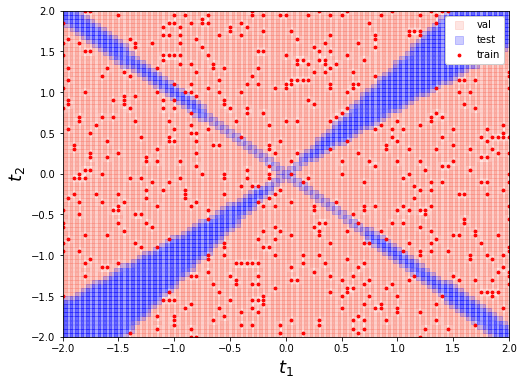

In [15]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {"fname": "./simulation/test"}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [1]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

## Testing Experiment class

In [2]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [3]:
experiment.print_train_val_test()

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


#### Viewing dataset summary

In [4]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.507919
1    0.492081
Name: phase, dtype: float64


total train/val phases: 
0    2822
1    2734
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.552133
0    0.447867
Name: phase, dtype: float64


total test phases: 
1    466
0    378
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    3200
0    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [5]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,0,test
1,0,999,0,test
2,0,999,0,test
3,0,999,0,test
4,0,999,0,test


#### Vieweng Hamiltonian summary

In [6]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.52,0.48,999,0
1,-2.0,-1.95,test,0.67,0.33,0,0
2,-2.0,-1.90,test,0.72,0.28,0,0
3,-2.0,-1.85,test,0.81,0.19,0,0
4,-2.0,-1.80,test,0.88,0.12,0,0


#### Viewing accuracy

In [7]:
experiment.accuracy

{'eigenvector_train': 0.981726618705036,
 'eigenvector_val': 0.965216,
 'eigenvector_test': 0.8052843601895735,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.995260663507109}

#### Visualizing train/val/test splits with scatter plot

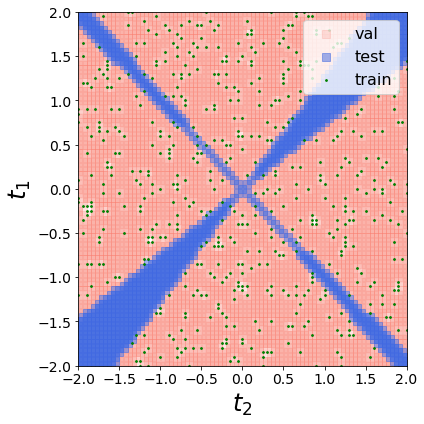

In [8]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

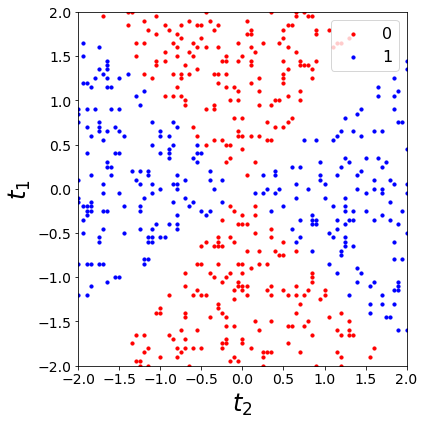

In [9]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

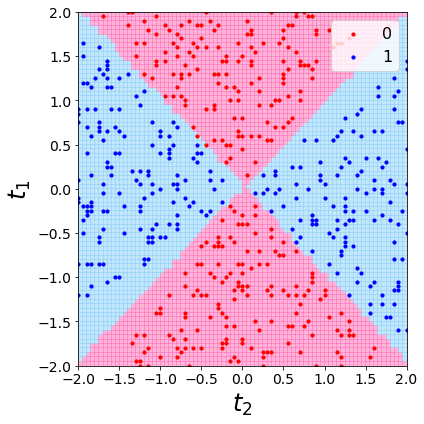

In [10]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

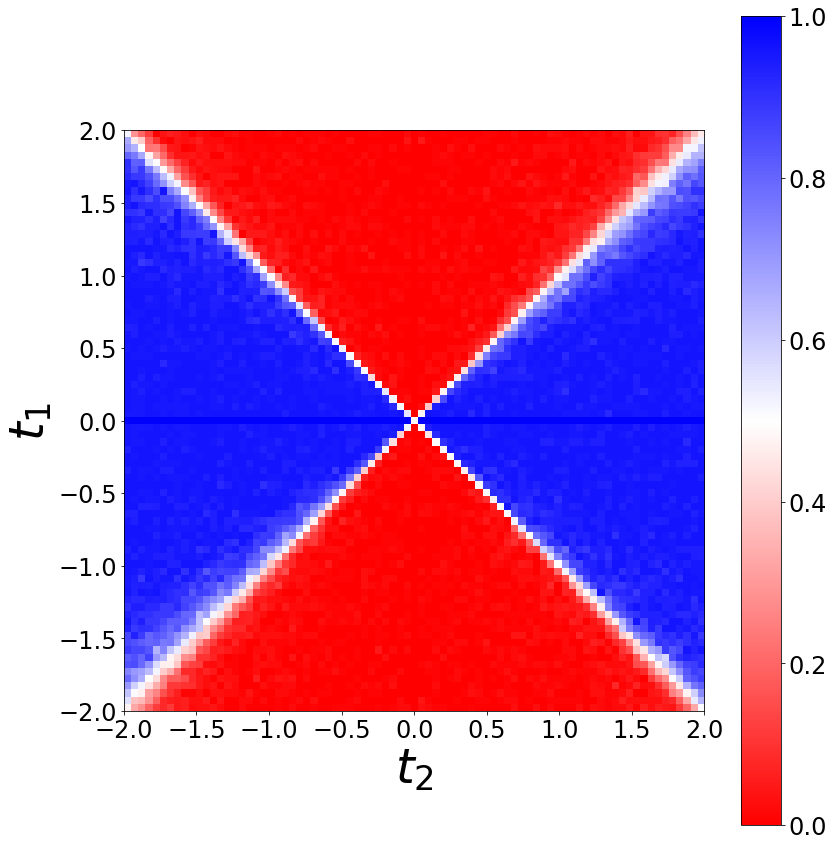

In [11]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [12]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [13]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 144045.21it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


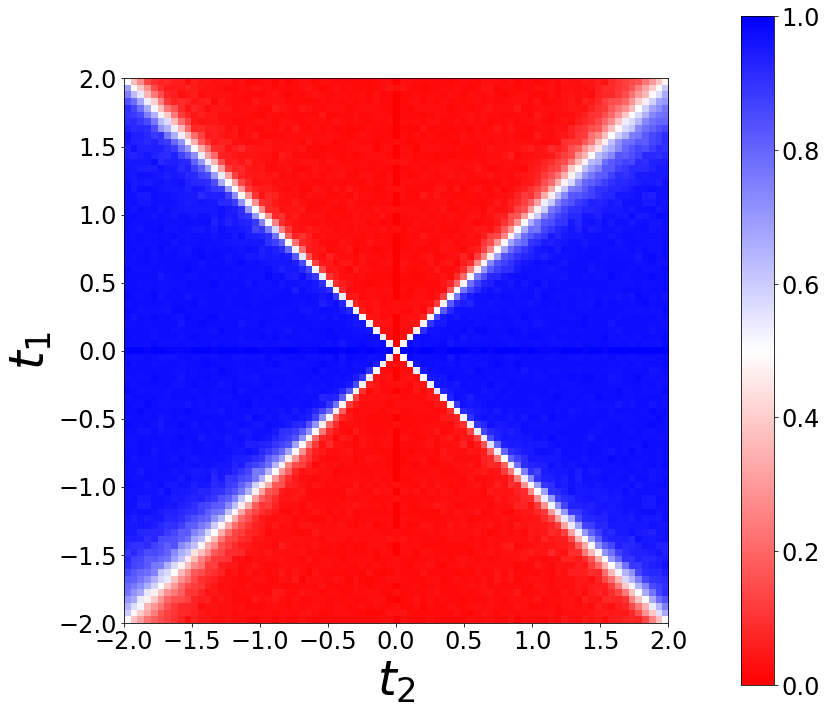

In [14]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [17]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  6.05it/s]


{'eigenvector_train': 0.9814742805755394,
 'eigenvector_val': 0.9640351800000001,
 'eigenvector_test': 0.7936368483412322,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9930331753554503}

#### Computing bootstrap accuracies

In [18]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0, 'hamiltonian_val': 1.0, 'hamiltonian_test': 1.0}

#### Computing mean feature importances

In [19]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 2022.38it/s]

Sorted feature importances:  [(0, 0.16932371400308938), (50, 0.1569404713267093), (51, 0.11881821845096727), (3, 0.100113057422875), (1, 0.08833645670539095), (53, 0.07837813805420905), (99, 0.017137340258935072), (49, 0.013544099398807017), (2, 0.009992798454127018), (55, 0.008899456950126781), (5, 0.007823710348916617), (98, 0.007494468460031406), (95, 0.00738275466428481), (52, 0.007005666708344665), (7, 0.006967174994060989), (35, 0.005959658515918648), (57, 0.005851157715806231), (48, 0.005534424851910129), (19, 0.005422787863085272), (45, 0.004963565308137966), (69, 0.004363953405803116), (11, 0.0042282947999594325), (27, 0.004200026789405737), (77, 0.004151279783749824), (91, 0.004139479064893978), (4, 0.0041373378833763725), (79, 0.0038426254810867166), (85, 0.0038119812802411947), (59, 0.0037633242512905853), (54, 0.0036882206642288606), (47, 0.0036294662699986827), (63, 0.0035546808121962666), (9, 0.0032653104287658926), (46, 0.0032529741800199994), (41, 0.003234642490851009)

#### Plotting feature importances

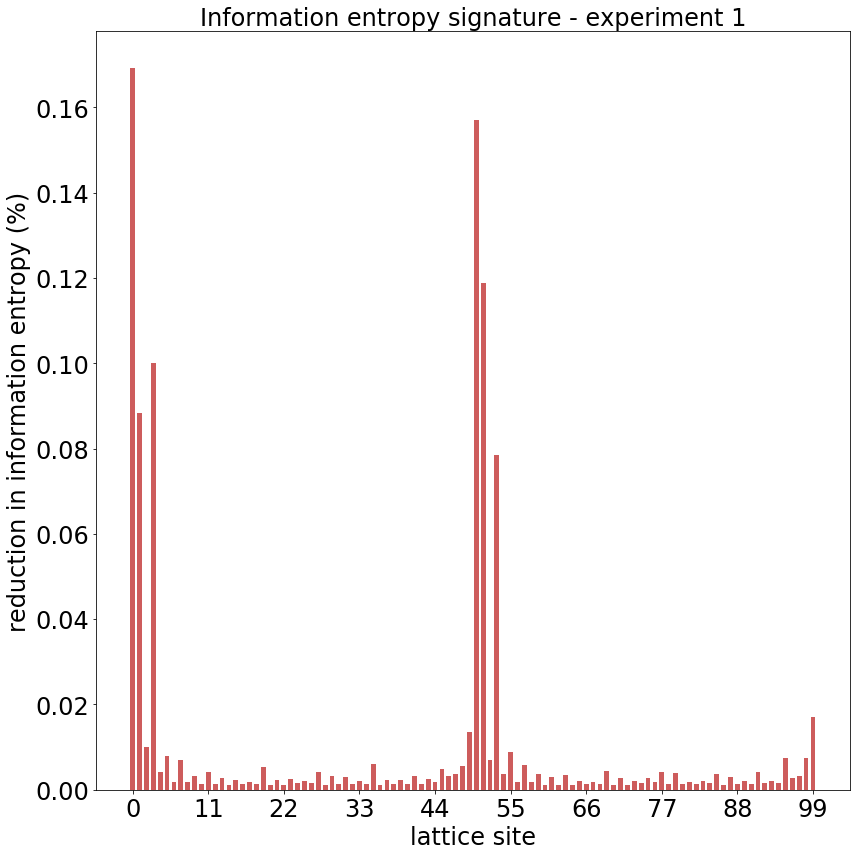

In [21]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

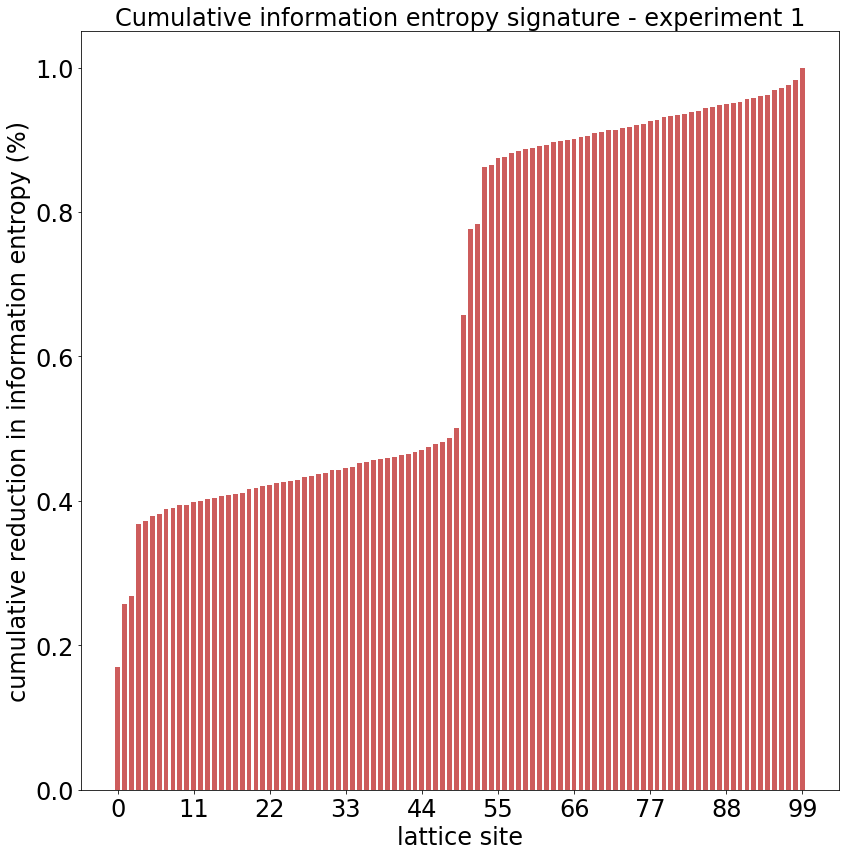

In [22]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features

We now rerun the simulations using the most relevant features only

In [25]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 354 µs, sys: 12 µs, total: 366 µs
Wall time: 243 µs


In [26]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/nearest_neighbour.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/nearest_neighbours_less_features"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,1,3,50,51,53]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat100
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 6.89 s, sys: 332 ms, total: 7.22 s
Wall time: 6.66 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000


### Running simulation

In [27]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [04:23<00:00,  2.83s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.001204,-0.016530,...,-0.134123,-0.138686,-0.118757,-0.127445,-0.095929,-0.108196,-0.067073,-0.082149,-0.034003,-0.050940
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.141421,-0.138980,...,0.043375,0.067830,-0.009222,0.017385,-0.060524,-0.035502,-0.103326,-0.083403,-0.131616,-0.119589
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.000826,0.025688,...,0.134753,0.124324,0.141088,0.140407,0.127608,0.136771,0.096206,0.113925,0.051292,0.075079
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141417,0.136684,...,-0.115093,-0.131915,-0.061266,-0.091040,0.007717,-0.027643,0.074791,0.042592,0.123363,0.102291
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.001302,0.036430,...,0.082068,0.050848,0.127402,0.108132,0.141218,0.138667,0.120099,0.134896,0.069268,0.097755


#### Loading simulation

In [28]:
simulation_dir = "/home/rio/data/phase_transitions/nearest_neighbours_less_features"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [29]:
simulation.n_experiments

100

In [30]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 131665.89it/s]


#### Computing mean accuracies with less features

In [31]:
simulation.n_experiments

100

In [32]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.83it/s]


{'eigenvector_train': 0.9713580935251798,
 'eigenvector_val': 0.9449356600000002,
 'eigenvector_test': 0.7864348341232227,
 'hamiltonian_train': 0.9890647482014387,
 'hamiltonian_val': 0.9852160000000001,
 'hamiltonian_test': 0.9891824644549765}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


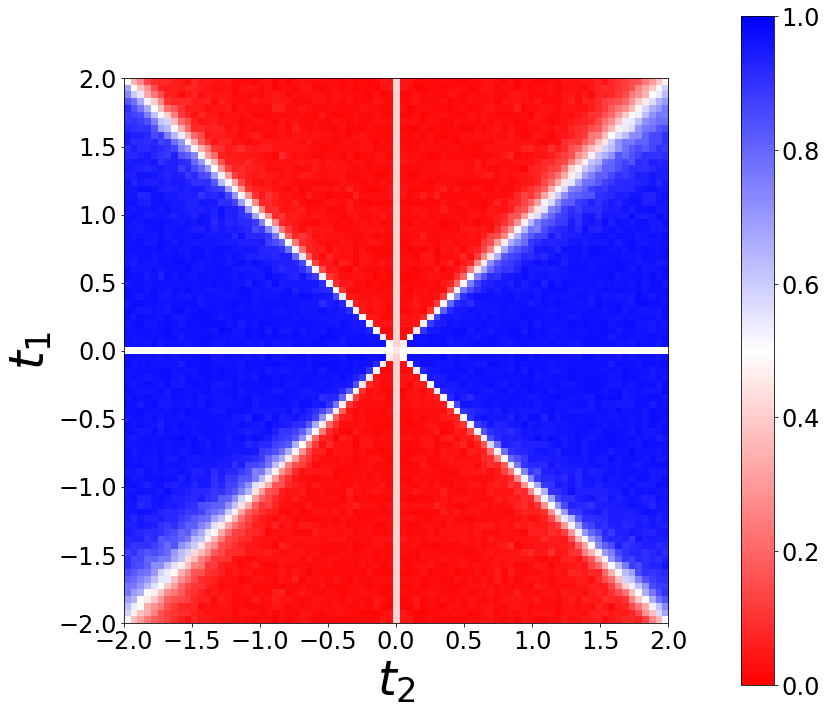

In [33]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1a-6561-less-simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features

In [19]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/nearest_neighbour.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/nearest_neighbours_random_features"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat100
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 6.83 s, sys: 264 ms, total: 7.1 s
Wall time: 6.68 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000


#### Running simulation

In [20]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 6
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [94 38 77 19 75 78]


running experiments:   1%|          | 1/100 [00:03<05:03,  3.07s/it]

random_features:  [98  5 77 57 19 55]


running experiments:   2%|▏         | 2/100 [00:05<04:54,  3.00s/it]

random_features:  [41 47 54 50 88 55]


running experiments:   3%|▎         | 3/100 [00:08<04:40,  2.89s/it]

random_features:  [68 82 61 88 65  8]


running experiments:   4%|▍         | 4/100 [00:11<04:30,  2.82s/it]

random_features:  [49 96 15 51 65 57]


running experiments:   5%|▌         | 5/100 [00:14<04:27,  2.82s/it]

random_features:  [11 38 23 22 48 58]


running experiments:   6%|▌         | 6/100 [00:16<04:21,  2.78s/it]

random_features:  [64 69 26 37 78 96]


running experiments:   7%|▋         | 7/100 [00:19<04:16,  2.76s/it]

random_features:  [64 58 94 72 73 39]


running experiments:   8%|▊         | 8/100 [00:22<04:13,  2.75s/it]

random_features:  [33 54 16 19 47 86]


running experiments:   9%|▉         | 9/100 [00:24<04:09,  2.74s/it]

random_features:  [23 63 60 89 89 32]


running experiments:  10%|█         | 10/100 [00:27<04:06,  2.74s/it]

random_features:  [47 76 46 23 20 43]


running experiments:  11%|█         | 11/100 [00:30<04:03,  2.74s/it]

random_features:  [76 35  6 91 16 53]


running experiments:  12%|█▏        | 12/100 [00:33<04:00,  2.74s/it]

random_features:  [ 4 64 92 41 62 29]


running experiments:  13%|█▎        | 13/100 [00:35<03:57,  2.73s/it]

random_features:  [49 98 46 20 53 87]


running experiments:  14%|█▍        | 14/100 [00:38<03:52,  2.71s/it]

random_features:  [30 54 95 25 67  4]


running experiments:  15%|█▌        | 15/100 [00:41<03:52,  2.73s/it]

random_features:  [83 80 73 47 74 40]


running experiments:  16%|█▌        | 16/100 [00:43<03:48,  2.72s/it]

random_features:  [32 19 37 98 26 16]


running experiments:  17%|█▋        | 17/100 [00:46<03:46,  2.73s/it]

random_features:  [53 21 35 48 80 79]


running experiments:  18%|█▊        | 18/100 [00:49<03:43,  2.73s/it]

random_features:  [24 23 62 74 65 83]


running experiments:  19%|█▉        | 19/100 [00:52<03:40,  2.72s/it]

random_features:  [ 0 15 83 54 35 13]


running experiments:  20%|██        | 20/100 [00:54<03:37,  2.72s/it]

random_features:  [28 27 10 43 69 12]


running experiments:  21%|██        | 21/100 [00:57<03:37,  2.76s/it]

random_features:  [63 97 24 37 16 82]


running experiments:  22%|██▏       | 22/100 [01:00<03:34,  2.75s/it]

random_features:  [21 18 77  1  8 27]


running experiments:  23%|██▎       | 23/100 [01:03<03:33,  2.77s/it]

random_features:  [67 24 82 43 55 49]


running experiments:  24%|██▍       | 24/100 [01:06<03:31,  2.78s/it]

random_features:  [25 65 85 92 97 11]


running experiments:  25%|██▌       | 25/100 [01:08<03:28,  2.78s/it]

random_features:  [65 85 54 93 55 99]


running experiments:  26%|██▌       | 26/100 [01:11<03:28,  2.82s/it]

random_features:  [82 22 13 86 17 22]


running experiments:  27%|██▋       | 27/100 [01:14<03:21,  2.77s/it]

random_features:  [14 10 94 54 96 23]


running experiments:  28%|██▊       | 28/100 [01:17<03:20,  2.78s/it]

random_features:  [21 23 55 23 68 39]


running experiments:  29%|██▉       | 29/100 [01:19<03:16,  2.77s/it]

random_features:  [90 67 32 55 91 90]


running experiments:  30%|███       | 30/100 [01:22<03:16,  2.80s/it]

random_features:  [95 15 89 28 94 17]


running experiments:  31%|███       | 31/100 [01:25<03:11,  2.78s/it]

random_features:  [66 96 91 86 16 75]


running experiments:  32%|███▏      | 32/100 [01:28<03:07,  2.76s/it]

random_features:  [13 89 95 88 45 59]


running experiments:  33%|███▎      | 33/100 [01:30<03:03,  2.74s/it]

random_features:  [99 33 62 17 51 21]


running experiments:  34%|███▍      | 34/100 [01:33<03:00,  2.74s/it]

random_features:  [50 32  9 28 26  4]


running experiments:  35%|███▌      | 35/100 [01:36<03:02,  2.80s/it]

random_features:  [31 28 74 37 43 75]


running experiments:  36%|███▌      | 36/100 [01:39<03:00,  2.83s/it]

random_features:  [44 52 13 91 42 38]


running experiments:  37%|███▋      | 37/100 [01:42<03:00,  2.87s/it]

random_features:  [24 54 14 69 71  5]


running experiments:  38%|███▊      | 38/100 [01:45<03:01,  2.93s/it]

random_features:  [26 63 56 99  7 52]


running experiments:  39%|███▉      | 39/100 [01:48<02:55,  2.88s/it]

random_features:  [50 60 21 87 57 18]


running experiments:  40%|████      | 40/100 [01:51<02:50,  2.84s/it]

random_features:  [68 64 59 90 37 59]


running experiments:  41%|████      | 41/100 [01:53<02:49,  2.87s/it]

random_features:  [16 58 90 21 54 55]


running experiments:  42%|████▏     | 42/100 [01:56<02:45,  2.86s/it]

random_features:  [84 76 42 77 49 18]


running experiments:  43%|████▎     | 43/100 [01:59<02:43,  2.87s/it]

random_features:  [92 60  7 54  0 71]


running experiments:  44%|████▍     | 44/100 [02:02<02:36,  2.79s/it]

random_features:  [93 48 83 59 37 81]


running experiments:  45%|████▌     | 45/100 [02:05<02:33,  2.78s/it]

random_features:  [52 18 63 42 55 93]


running experiments:  46%|████▌     | 46/100 [02:07<02:29,  2.78s/it]

random_features:  [97 16 22 36 76 34]


running experiments:  47%|████▋     | 47/100 [02:10<02:27,  2.78s/it]

random_features:  [ 6 30 99 20 92 87]


running experiments:  48%|████▊     | 48/100 [02:13<02:24,  2.78s/it]

random_features:  [43 14 50 77 35 10]


running experiments:  49%|████▉     | 49/100 [02:16<02:19,  2.73s/it]

random_features:  [47 80 52 18 47 39]


running experiments:  50%|█████     | 50/100 [02:18<02:16,  2.72s/it]

random_features:  [ 2 22 56 91 55 55]


running experiments:  51%|█████     | 51/100 [02:21<02:13,  2.72s/it]

random_features:  [81 75 47 35 40 89]


running experiments:  52%|█████▏    | 52/100 [02:24<02:11,  2.74s/it]

random_features:  [45 67 89 79 70 48]


running experiments:  53%|█████▎    | 53/100 [02:26<02:08,  2.74s/it]

random_features:  [62 40 35 17 17 46]


running experiments:  54%|█████▍    | 54/100 [02:29<02:08,  2.79s/it]

random_features:  [33 98 25 24 43 15]


running experiments:  55%|█████▌    | 55/100 [02:32<02:05,  2.78s/it]

random_features:  [95 49 45 40  0 76]


running experiments:  56%|█████▌    | 56/100 [02:35<01:59,  2.72s/it]

random_features:  [60 66 10 73 11 81]


running experiments:  57%|█████▋    | 57/100 [02:37<01:56,  2.72s/it]

random_features:  [44 29 65  9 33 42]


running experiments:  58%|█████▊    | 58/100 [02:40<01:54,  2.72s/it]

random_features:  [98 53 10  0 55 81]


running experiments:  59%|█████▉    | 59/100 [02:43<01:49,  2.66s/it]

random_features:  [ 8 96  0 83 52  6]


running experiments:  60%|██████    | 60/100 [02:45<01:47,  2.68s/it]

random_features:  [ 8 59 95 14 56 43]


running experiments:  61%|██████    | 61/100 [02:48<01:45,  2.69s/it]

random_features:  [42  0 68  2  4 90]


running experiments:  62%|██████▏   | 62/100 [02:51<01:49,  2.89s/it]

random_features:  [23 56 82  1 58 64]


running experiments:  63%|██████▎   | 63/100 [02:54<01:47,  2.91s/it]

random_features:  [89 19 75  3 17 41]


running experiments:  64%|██████▍   | 64/100 [02:58<01:46,  2.96s/it]

random_features:  [69 45 78 46 80 44]


running experiments:  65%|██████▌   | 65/100 [03:00<01:43,  2.95s/it]

random_features:  [42 14 39 53 80 34]


running experiments:  66%|██████▌   | 66/100 [03:03<01:38,  2.90s/it]

random_features:  [69 27 81 19  0 89]


running experiments:  67%|██████▋   | 67/100 [03:06<01:35,  2.88s/it]

random_features:  [75 95 45 24 83 89]


running experiments:  68%|██████▊   | 68/100 [03:09<01:31,  2.87s/it]

random_features:  [ 0 79 92 44  6 28]


running experiments:  69%|██████▉   | 69/100 [03:12<01:27,  2.81s/it]

random_features:  [36 24 47 74 48  1]


running experiments:  70%|███████   | 70/100 [03:14<01:23,  2.77s/it]

random_features:  [26 99 48 75 81 35]


running experiments:  71%|███████   | 71/100 [03:17<01:21,  2.82s/it]

random_features:  [82 11 16 27 29 47]


running experiments:  72%|███████▏  | 72/100 [03:20<01:19,  2.84s/it]

random_features:  [35 89  2 34  4 85]


running experiments:  73%|███████▎  | 73/100 [03:23<01:17,  2.86s/it]

random_features:  [91 26 51 39 51  5]


running experiments:  74%|███████▍  | 74/100 [03:26<01:14,  2.85s/it]

random_features:  [71 49 19 37 96 47]


running experiments:  75%|███████▌  | 75/100 [03:29<01:12,  2.90s/it]

random_features:  [57 81 17 77 81 78]


running experiments:  76%|███████▌  | 76/100 [03:32<01:08,  2.85s/it]

random_features:  [45  7 85 69 71 27]


running experiments:  77%|███████▋  | 77/100 [03:35<01:07,  2.93s/it]

random_features:  [87 83 25 26 39 71]


running experiments:  78%|███████▊  | 78/100 [03:38<01:04,  2.94s/it]

random_features:  [61 76 92  5  3 28]


running experiments:  79%|███████▉  | 79/100 [03:40<01:00,  2.90s/it]

random_features:  [89 56 82 67 83 89]


running experiments:  80%|████████  | 80/100 [03:43<00:58,  2.91s/it]

random_features:  [66 23 15 63 41 24]


running experiments:  81%|████████  | 81/100 [03:46<00:56,  2.95s/it]

random_features:  [27 75 25 79 84 73]


running experiments:  82%|████████▏ | 82/100 [03:49<00:52,  2.93s/it]

random_features:  [91 58 75 46 70 41]


running experiments:  83%|████████▎ | 83/100 [03:52<00:48,  2.86s/it]

random_features:  [39 26 42 10 65 80]


running experiments:  84%|████████▍ | 84/100 [03:55<00:45,  2.85s/it]

random_features:  [34 39  2 23 44 76]


running experiments:  85%|████████▌ | 85/100 [03:58<00:43,  2.88s/it]

random_features:  [17 40 89 76 89 40]


running experiments:  86%|████████▌ | 86/100 [04:01<00:40,  2.89s/it]

random_features:  [ 6  4 45 59 68 83]


running experiments:  87%|████████▋ | 87/100 [04:03<00:37,  2.86s/it]

random_features:  [29 73 29 49 30 28]


running experiments:  88%|████████▊ | 88/100 [04:06<00:33,  2.83s/it]

random_features:  [55 49 82 33 94 15]


running experiments:  89%|████████▉ | 89/100 [04:09<00:31,  2.87s/it]

random_features:  [95 73 57  7 62 91]


running experiments:  90%|█████████ | 90/100 [04:12<00:28,  2.84s/it]

random_features:  [87 17  5 14 80 30]


running experiments:  91%|█████████ | 91/100 [04:15<00:25,  2.81s/it]

random_features:  [41 35 75 78 47 57]


running experiments:  92%|█████████▏| 92/100 [04:18<00:22,  2.83s/it]

random_features:  [14 64  5 67 52 93]


running experiments:  93%|█████████▎| 93/100 [04:20<00:19,  2.84s/it]

random_features:  [56 70 52 65 12 97]


running experiments:  94%|█████████▍| 94/100 [04:23<00:17,  2.85s/it]

random_features:  [99 64 83 46 80  0]


running experiments:  95%|█████████▌| 95/100 [04:26<00:13,  2.78s/it]

random_features:  [81 67  4 43 78 20]


running experiments:  96%|█████████▌| 96/100 [04:29<00:10,  2.74s/it]

random_features:  [15 68 94  5 14 11]


running experiments:  97%|█████████▋| 97/100 [04:31<00:08,  2.78s/it]

random_features:  [30 84 18 21 51 73]


running experiments:  98%|█████████▊| 98/100 [04:34<00:05,  2.83s/it]

random_features:  [11 19 83 33 92 20]


running experiments:  99%|█████████▉| 99/100 [04:37<00:02,  2.86s/it]

random_features:  [80 25 54 67 29 21]


running experiments: 100%|██████████| 100/100 [04:40<00:00,  2.82s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.001204,-0.016530,...,-0.134123,-0.138686,-0.118757,-0.127445,-0.095929,-0.108196,-0.067073,-0.082149,-0.034003,-0.050940
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,-0.141421,-0.138980,...,0.043375,0.067830,-0.009222,0.017385,-0.060524,-0.035502,-0.103326,-0.083403,-0.131616,-0.119589
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,-0.000826,0.025688,...,0.134753,0.124324,0.141088,0.140407,0.127608,0.136771,0.096206,0.113925,0.051292,0.075079
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141417,0.136684,...,-0.115093,-0.131915,-0.061266,-0.091040,0.007717,-0.027643,0.074791,0.042592,0.123363,0.102291
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.001302,0.036430,...,0.082068,0.050848,0.127402,0.108132,0.141218,0.138667,0.120099,0.134896,0.069268,0.097755


#### Loading simulation with random features

In [21]:
simulation_dir = "/home/rio/data/phase_transitions/nearest_neighbours_random_features"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary for simulation with random features

In [22]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 131122.59it/s]


#### Computing mean accuracies for simulation with random features

In [23]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:16<00:00,  6.34it/s]


{'eigenvector_train': 0.9694519784172659,
 'eigenvector_val': 0.9191064800000001,
 'eigenvector_test': 0.7255721563981042,
 'hamiltonian_train': 0.9882014388489209,
 'hamiltonian_val': 0.9821980000000002,
 'hamiltonian_test': 0.9614099526066352}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


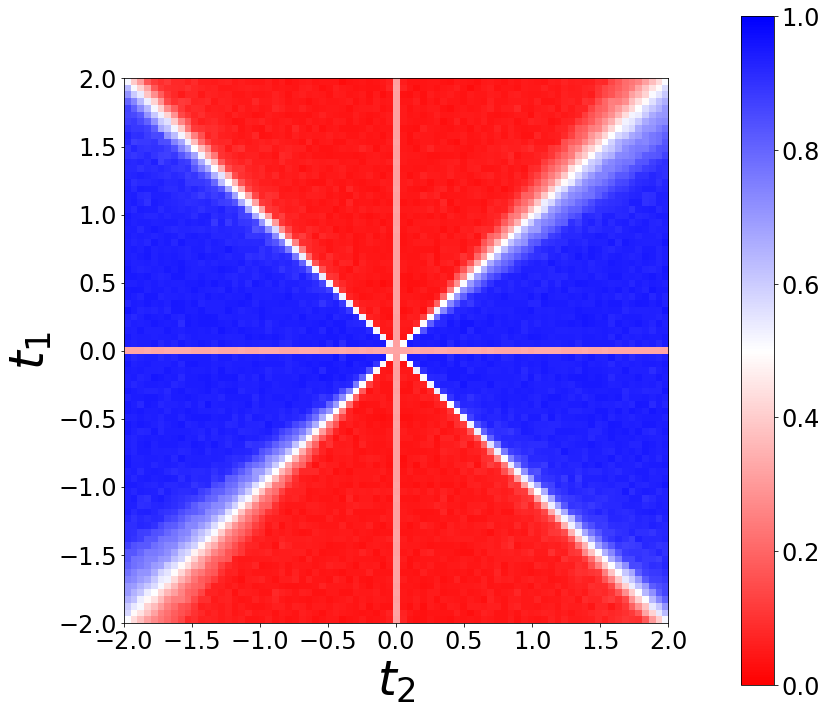

In [24]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1a-6561-random-simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

In [178]:
%%time
simulation_dir = "/home/rio/data/phase_transitions/nearest_neighbours_random_features"
for exp in range(100):
    print("accuracy for experiment ", exp)
    #path = os.path.join(directory,exp)
    experiment = Experiment(simulation_dir,str(exp)) 
    print(experiment.accuracy)
    print("\n")

accuracy for experiment  0
{'eigenvector_train': 0.8985251798561151, 'eigenvector_val': 0.57323, 'eigenvector_test': 0.5378909952606635, 'hamiltonian_train': 0.9838129496402878, 'hamiltonian_val': 0.6912, 'hamiltonian_test': 0.6255924170616114}


accuracy for experiment  1
{'eigenvector_train': 0.9135431654676259, 'eigenvector_val': 0.545068, 'eigenvector_test': 0.5213507109004739, 'hamiltonian_train': 0.9910071942446043, 'hamiltonian_val': 0.6864, 'hamiltonian_test': 0.6421800947867299}


accuracy for experiment  2
{'eigenvector_train': 0.9725179856115108, 'eigenvector_val': 0.773502, 'eigenvector_test': 0.6243483412322275, 'hamiltonian_train': 0.9910071942446043, 'hamiltonian_val': 0.985, 'hamiltonian_test': 0.9300947867298578}


accuracy for experiment  3
{'eigenvector_train': 0.966726618705036, 'eigenvector_val': 0.755622, 'eigenvector_test': 0.6223104265402843, 'hamiltonian_train': 0.9856115107913669, 'hamiltonian_val': 0.9856, 'hamiltonian_test': 0.8921800947867299}


accuracy fo

{'eigenvector_train': 0.9633812949640288, 'eigenvector_val': 0.757346, 'eigenvector_test': 0.6132582938388625, 'hamiltonian_train': 0.9820143884892086, 'hamiltonian_val': 0.9844, 'hamiltonian_test': 0.8921800947867299}


accuracy for experiment  35
{'eigenvector_train': 0.9706474820143884, 'eigenvector_val': 0.755458, 'eigenvector_test': 0.6081753554502369, 'hamiltonian_train': 0.9892086330935251, 'hamiltonian_val': 0.9848, 'hamiltonian_test': 0.9063981042654028}


accuracy for experiment  36
{'eigenvector_train': 0.9741007194244604, 'eigenvector_val': 0.752884, 'eigenvector_test': 0.6143009478672986, 'hamiltonian_train': 0.9928057553956835, 'hamiltonian_val': 0.9832, 'hamiltonian_test': 0.9087677725118484}


accuracy for experiment  37
{'eigenvector_train': 0.9731294964028777, 'eigenvector_val': 0.686116, 'eigenvector_test': 0.39842417061611374, 'hamiltonian_train': 0.9928057553956835, 'hamiltonian_val': 0.9784, 'hamiltonian_test': 0.12677725118483413}


accuracy for experiment  38
{'

{'eigenvector_train': 0.9677697841726619, 'eigenvector_val': 0.685836, 'eigenvector_test': 0.3959123222748815, 'hamiltonian_train': 0.987410071942446, 'hamiltonian_val': 0.9802, 'hamiltonian_test': 0.11729857819905214}


accuracy for experiment  70
{'eigenvector_train': 0.9673920863309352, 'eigenvector_val': 0.60025, 'eigenvector_test': 0.4600947867298578, 'hamiltonian_train': 0.9892086330935251, 'hamiltonian_val': 0.7948, 'hamiltonian_test': 0.38270142180094785}


accuracy for experiment  71
{'eigenvector_train': 0.9738848920863309, 'eigenvector_val': 0.746326, 'eigenvector_test': 0.6287559241706161, 'hamiltonian_train': 0.9928057553956835, 'hamiltonian_val': 0.9848, 'hamiltonian_test': 0.9502369668246445}


accuracy for experiment  72
{'eigenvector_train': 0.9691726618705035, 'eigenvector_val': 0.731494, 'eigenvector_test': 0.6239810426540284, 'hamiltonian_train': 0.987410071942446, 'hamiltonian_val': 0.9854, 'hamiltonian_test': 0.9632701421800948}


accuracy for experiment  73
{'eig

In [ ]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/nearest_neighbours"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)